In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, atan, pi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img1 = cv2.imread('/content/drive/My Drive/csc420_a3/image1.jpeg')
img2 = cv2.imread('/content/drive/My Drive/csc420_a3/image2.jpeg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Step 1.

In [3]:
def second_moment_matrix(img, sigma):
    # finding eigenvalues for the image using second moment matrix method
    m, n = img.shape
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1)

    IxIy = np.multiply(Ix, Iy)
    Ix2 = np.multiply(Ix, Ix)
    Iy2 = np.multiply(Iy, Iy)
    
    Ix2_blur = cv2.GaussianBlur(Ix2,(9,9), sigma)
    Iy2_blur = cv2.GaussianBlur(Iy2,(9,9), sigma)
    IxIy_blur = cv2.GaussianBlur(IxIy,(9,9), sigma)

    e = np.zeros((m, n, 2))
    for i in range(m):
        for j in range(n):
            lambda1, lambda2 = np.linalg.eigvals(np.array([[Ix2_blur[i][j], IxIy_blur[i][j]],
                                                       [IxIy_blur[i][j], Iy2_blur[i][j]]]))
            e[i][j] = [lambda1, lambda2]
    return e

# Step 2.

In [5]:
sigma = 1 
eigvalues1 = second_moment_matrix(gray1, sigma)
eigvalues2 = second_moment_matrix(gray2, sigma)
e1_l1 = eigvalues1[:,:,0]
e1_l2 = eigvalues1[:,:,1]
e2_l1 = eigvalues2[:,:,0]
e2_l2 = eigvalues2[:,:,1]

In [ ]:
plt.scatter(e1_l1, e1_l2, s=sigma)
plt.xlabel("lambda1")
plt.ylabel("lambda2")
plt.title("Image 1, Eigenvalues plot, Sigma=1")
plt.savefig(('/content/drive/My Drive/csc420_a3/plot1.png'))
plt.show()

In [ ]:
plt.scatter(e2_l1, e2_l2, s=sigma)
plt.xlabel("lambda1")
plt.ylabel("lambda2")
plt.title("Image 2, Eigenvalues plot, Sigma=1")
plt.savefig(('/content/drive/My Drive/csc420_a3/plot2.png'))
plt.show()

# Step 3.

In [ ]:
im1 = cv2.imread('/content/drive/My Drive/csc420_a3/image1.jpeg')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

threshold =  15000 #based on the scatter plot
_min = np.minimum(e1_l1, e1_l2)
im1[_min > threshold] = [255, 0, 0]
plt.figure(figsize=(14,12))
plt.imshow(im1)
im1 = cv2.cvtColor(im1, cv2.COLOR_RGB2BGR)
cv2.imwrite('/content/drive/My Drive/csc420_a3/image1_corners.png', im1)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

In [ ]:
im2 = cv2.imread('/content/drive/My Drive/csc420_a3/image2.jpeg')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
threshold = 25000 #based on the scatter plot
_min = np.minimum(e2_l1, e2_l2)
im2[_min > threshold] = [255, 0, 0]
plt.figure(figsize=(14,12))
plt.imshow(im2)
im2 = cv2.cvtColor(im2, cv2.COLOR_RGB2BGR)
cv2.imwrite('/content/drive/My Drive/csc420_a3/image2_corners.png', im2)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

# Step 4. Sigma 10

In [23]:
sigma = 5
new_eigvalues1 = second_moment_matrix(gray1, sigma)
new_eigvalues2 = second_moment_matrix(gray2, sigma)
new_e1_l1 = new_eigvalues1[:,:,0]
new_e1_l2 = new_eigvalues1[:,:,1]
new_e2_l1 = new_eigvalues2[:,:,0]
new_e2_l2 = new_eigvalues2[:,:,1]

In [ ]:
plt.scatter(new_e1_l1, new_e1_l2, s=sigma)
plt.xlabel("lambda1")
plt.ylabel("lambda2")
plt.title("Image 1, Eigenvalues plot, Sigma=5")
plt.savefig(('/content/drive/My Drive/csc420_a3/plot3.png'))
plt.show()

In [ ]:
plt.scatter(new_e2_l1, new_e2_l2, s=sigma)
plt.xlabel("lambda1")
plt.ylabel("lambda2")
plt.title("Image 2, Eigenvalues plot, Sigma=5")
plt.savefig(('/content/drive/My Drive/csc420_a3/plot4.png'))
plt.show()

In [ ]:
im3 = cv2.imread('/content/drive/My Drive/csc420_a3/image1.jpeg')
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

threshold = 15000 #based on the scatter plot
_min = np.minimum(new_e1_l1, new_e1_l2)
im3[_min > threshold] = [255, 0, 0]
plt.figure(figsize=(14,12))
plt.imshow(im3)
im3 = cv2.cvtColor(im3, cv2.COLOR_RGB2BGR)
cv2.imwrite('/content/drive/My Drive/csc420_a3/image3_corners.png', im3)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

In [ ]:
im4 = cv2.imread('/content/drive/My Drive/csc420_a3/image2.jpeg')
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)

threshold = 25000 #based on the scatter plot
_min = np.minimum(new_e2_l1, new_e2_l2)
im4[_min > threshold] = [255, 0, 0]
plt.figure(figsize=(14,12))
plt.imshow(im4)
im4 = cv2.cvtColor(im4, cv2.COLOR_RGB2BGR)
cv2.imwrite('/content/drive/My Drive/csc420_a3/image4_corners.png', im4)
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)

# Compare sigma=1 and sigma=10

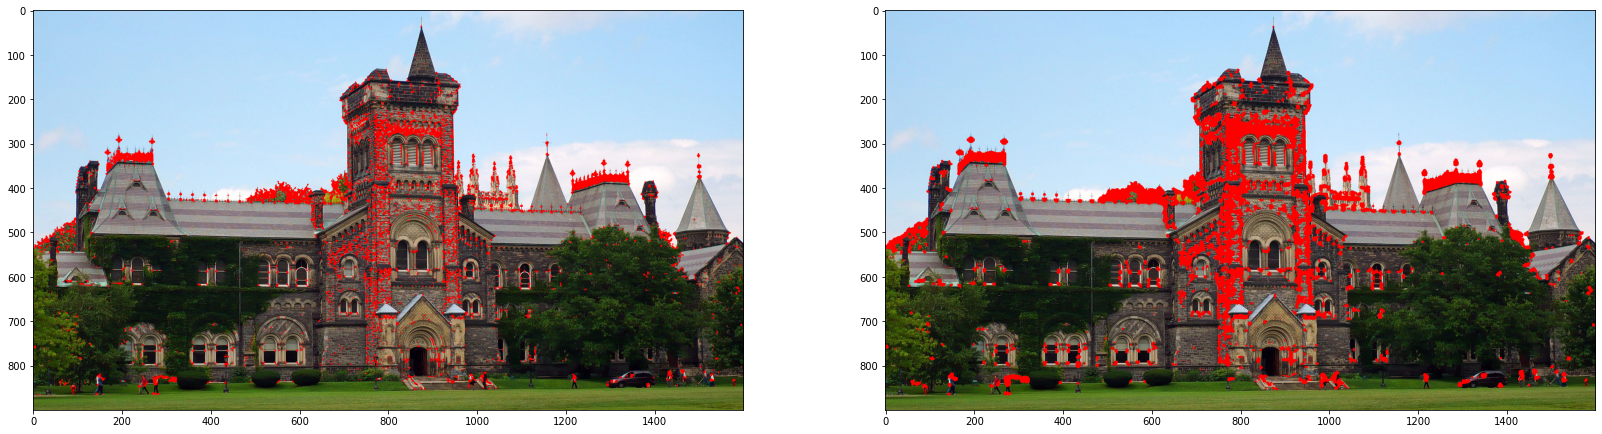

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(28, 24))
ax[0].imshow(im1)
ax[1].imshow(im3)
plt.show()

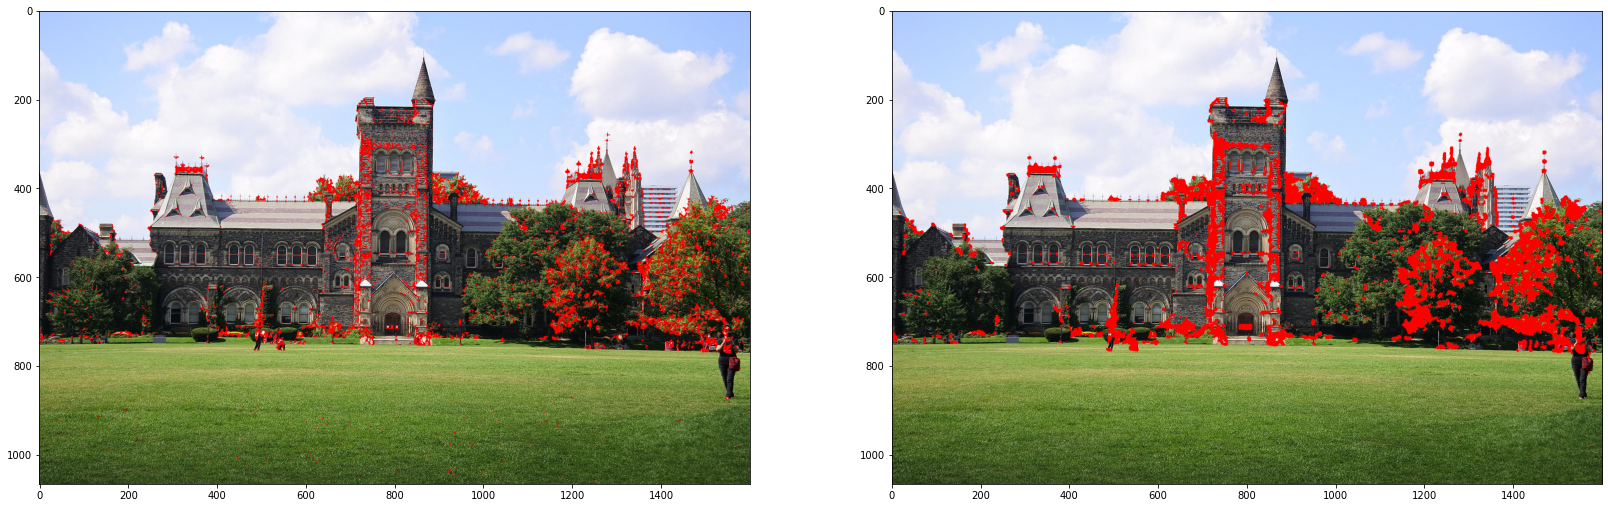

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(28, 24))
ax[0].imshow(im2)
ax[1].imshow(im4)
plt.show()

A smaller sigma produces a smaller filter, which leads to less smoothing, while a larger sigma produces a larger filter and more smoothing. A smaller sigma is more susceptible to noise, whereas a larger sigma reduces the impact of noise. 

I have compared the corner detection above using different sigma values, a larger sigma causes corners to appear less distinct and more rounded due to blurring as you notice on the right image, while a smaller sigma results in sharper and more angular corners. It is crucial to select the appropriate sigma value to balance the trade-off between smoothing and preserving essential image characteristics.



